In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
from collections import Counter
from sklearn import linear_model, datasets


Text(0.5,1,'Original')

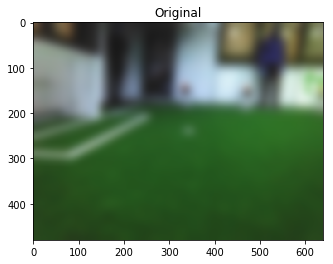

In [19]:
img = cv2.imread("testField.png")
blur =cv2.GaussianBlur(img,(71,71),10)
plt.imshow(blur)
plt.title('Original')

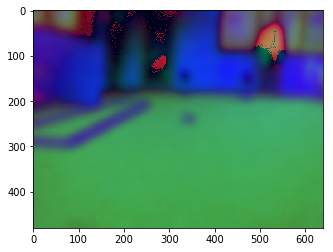

In [20]:
hsv =  cv2.cvtColor(blur,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
# laplacian = cv2.Laplacian(grey,cv2.CV_64F)
# plt.imshow(laplacian)
# plt.title('Original')
# print(laplacian)

In [21]:
def findgreen(image):
    thres = 63
    # find sample methods
    ys = np.random.choice(np.linspace(200,479,278),100)
    xs = np.random.choice(np.linspace(0,600,601),100)
    print(ys[1],xs[1])
    i=4
    print(image[int(ys[i]),int(xs[i])])
    values = [image[int(ys[i]),int(xs[i])] for i in range(100)]
    countVal = Counter(values)
    modus = countVal.most_common(1)[0][0]
    print(modus)
    # optie om via arrays sneller te maken
    minmod = np.array(np.array(modus) - thres)
    maxmod = np.array(np.array(modus) + thres)
    
#     return image[image<maxmod and image>minmod]
    nimage = image[:].copy()
    
    # Via opencv
    nimage = cv2.inRange(image,minmod,maxmod)
    
    return nimage

243.31046931407943 98.0
164
170


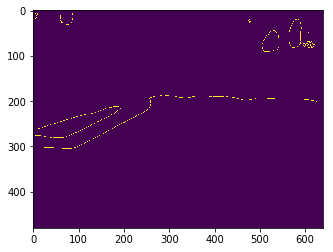

In [22]:
# Get edge from hue values of hsv
h,s,v = cv2.split(hsv)
new = findgreen(np.array(s))

edge = cv2.Canny(new, 20,40)
ransac = linear_model.RANSACRegressor()
y,x = np.argwhere(edge == 255)[:,0], np.argwhere(edge == 255)[:,1]

plt.imshow(edge)

In [23]:
#preprocess:
bot_mask = y < 400
xp = x[bot_mask]
yp = y[bot_mask]
data = np.array([xp,yp]).T
print(data)

[[ 61   0]
 [ 88   0]
 [ 61   1]
 ...
 [ 82 304]
 [ 83 304]
 [ 84 304]]


In [24]:
from skimage.measure import LineModelND, ransac
# https://scikit-image.org/docs/dev/api/skimage.measure.html?highlight=ransac#skimage.measure.ransac
# https://scikit-image.org/docs/dev/auto_examples/transform/plot_ransac.html

Number of reduced points: 207 1655


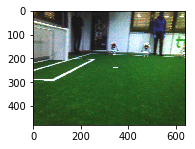

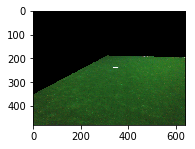

In [27]:
model_robust, inliers_mask = ransac(data, LineModelND, min_samples=2, residual_threshold=1, max_trials=300)
outliers_mask = inliers_mask == False
print("Number of reduced points:",len(data[inliers_mask]),len(data))

yin = data.T[1][inliers_mask]
xin = data.T[0][inliers_mask]
# plt.imshow(edge)
# plt.plot(xin,yin, "r.")

# from points get line:
Ny,Nx = np.shape(edge)
xdiff = xin[0] - xin[-1]
ydiff = yin[0] - yin[-1]
if xdiff == 0 or ydiff == 0:
    # in case line is horizontal or vertical
    exit()
a = ydiff/xdiff
b = yin[0] - xin[0]*a
line = a*np.arange(Nx) + b
# plt.plot(line)

# Do same for second line:
data2 = data[outliers_mask]
model_robust, inliers_mask = ransac(data2, LineModelND, min_samples=2, residual_threshold=1, max_trials=300)
yin = data2.T[1][inliers_mask]
xin = data2.T[0][inliers_mask]
plt.plot(xin,yin, "g.")

# from points get line:
Ny,Nx = np.shape(edge)
xdiff = xin[0] - xin[-1]
ydiff = yin[0] - yin[-1]
if xdiff == 0 or ydiff == 0:
    # in case line is horizontal or vertical
    exit()
a = ydiff/xdiff
b = yin[0] - xin[0]*a
line2 = a*np.arange(Nx) + b
# plt.plot(line2)
# plt.show()


# Area enclosed by first line
# Polygon coordinates [[top left], [top right], [bottom right], [bottom left]]
area1 = np.array([[[0,0],[Nx,0],[Nx,line[-1]],[0, line[0]]]], dtype=np.int32)
# ... second line
area2 = np.array( [[[0,0],[Nx,0],[Nx,line2[-1]],[0, line2[0]]]], dtype=np.int32 )
cv2.fillPoly(edge, area1, 255)
cv2.fillPoly(edge, area2, 255)

# Using tilde (~) to fill in either the field or the non-field part
plt.subplot(121), plt.imshow(~edge, cmap='Greys_r')
# plt.plot(xin,yin, "r.")

plt.imshow(img)
plt.figure()
original_copy = img
cv2.fillPoly(original_copy, area1, 0)
cv2.fillPoly(original_copy, area2, 0)
plt.subplot(122), plt.imshow(original_copy)

# plt.plot(line)
# plt.plot(line2)
plt.show()

## voor het checken of twee lijnen goed zijn: kijk ofze kruizen binnen image & iets lastiger of oppervlakte onder kruizing een mogelijk veld is

In [25]:
# werkt nog niet: Hoe mask van lijn?
res = cv2.bitwise_and(img,img,mask = greenSel)
plt.imshow(res)

NameError: name 'greenSel' is not defined

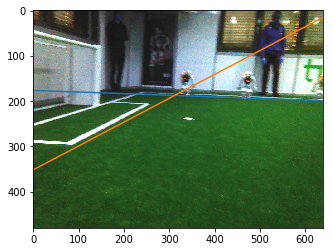

In [26]:
plt.imshow(img)
plt.plot(line)
plt.plot(line2)
plt.show()

 # Crap i dont want to throw away cuz im insecure

In [ ]:
    
    
    
    
    # Via Split:
#     b,g,r = cv2.split(nimage)
#     newcols = []
#     for idx, color in enumerate([b,g,r]):
#         newcol = []
#         minthresh = minmod[idx]
#         maxthresh = maxmod[idx]
#         for column in color:
#             column = np.array(column)
#             newcol.append((column<maxthresh) & (column > minthresh))
#         newcols.append(newcol)
#     print(newcols[0])
#     nimage = cv2.merge((newcols[0],newcols[1],newcols[2]))
        

    
#     im_bw = cv2.threshold(image, thres, 255, cv2.THRESH_BINARY)[1]
#     for y,yval in enumerate(image):
#         for x in range(len(yval)):
#             rgb = image[y, x]
# #             print(rgb)
#             if rgb[0] < modus[0]-thres or rgb[0] > modus[0]+thres:
#                 nimage[y, x] = [0, 0, 0]
#             elif rgb[1] < modus[1]-thres or rgb[1] > modus[1]+thres:
#                 nimage[y, x] = [0, 0, 0]
#             elif rgb[0] < modus[2]-thres or rgb[2] > modus[2]+thres:
#                 nimage[y, x] = [0, 0, 0]
#             else:
#                 nimage[y, x] = [255, 255, 255]